# Surface Density Radial Profile

In [1]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as c

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
# import my own classes
from galaxy.galaxy import Galaxy
from galaxy.galaxies import Galaxies
from galaxy.massprofile import MassProfile
from galaxy.timecourse import TimeCourse
from galaxy.centerofmass import CenterOfMass
from galaxy.surfacedensity import SurfaceDensityProfile

In this notebook, we are interested in the surface density radial profile of a galaxy's stellar disk, $\Sigma(r)$. Because we have all the particle data, we can first `RotateFrame` to align the disk particles with their total angular momentum and then modify the `MassProfile` code from HW 5 to divide disk into many annuli and compute the surface density in each annuli (total mass divided by the area of the annuli). 

A similar technique is widely used in protoplanetary disk (PPD) observations to obtain the radial intensity profile (the terms used are a bit different in that field: `deprojection` and `azimuthal averaging`).

In [7]:
sdp = {}
for gal in ('MW', 'M31', 'M33'):
    for snap in (0,295,600):
        sdp[f"{gal}_{snap:03}"] = SurfaceDensityProfile(gal, snap, usesql=True)

In [71]:
import pickle
with open("sdp.pkl","wb") as f:
    pickle.dump(sdp,f)

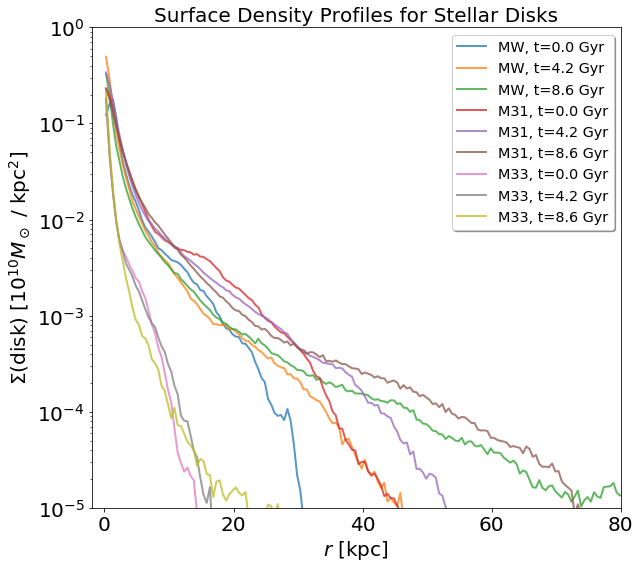

In [14]:
# plot the surface density profiles of the MW stellar disk
fig, ax = plt.subplots(figsize=(9, 8))

for k,v in sdp.items():
    t = v.t
    ax.semilogy(v.r_annuli, v.Sigma, label=f"{k[:-4]}, t={t:.1f} Gyr", lw=2, alpha=0.75)
        
fontsize = 18

ax.set_xlabel(r"$r$ [kpc]", fontsize=20)
ax.set_ylabel(r"$\Sigma$(disk) [$10^{10} M_\odot$ / kpc$^2$]", fontsize=20)
ax.set_title("Surface Density Profiles for Stellar Disks", fontsize=20)
ax.set(xlim=(-2, 80), ylim=(1e-5, 1))

# ax.set(xlabel=r"$r$ [kpc]", ylabel=r"$\Sigma$(disk) [$10^{10} M_\odot$ / kpc$^2$]", 
#        title="Surface Density Profiles for Stellar Disks", xlim=(-2, 80), ylim=(1e-5, 1))

ax.legend(loc='best',fontsize='x-large', shadow=True)

#adjust tick label font size
label_size = 20
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size
# rcParams['axes.titlesize'] = 24

fig.tight_layout()